In [207]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error


In [202]:
df=pd.read_csv('final_data.csv')

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Superficie          2211 non-null   object 
 1   Rooms               2211 non-null   object 
 2   Bedrooms            2211 non-null   object 
 3   Price               2211 non-null   object 
 4   Location            2211 non-null   object 
 5   description         2211 non-null   object 
 6   Loc_Paris           2211 non-null   int64  
 7   m2                  2211 non-null   float64
 8   building_floor      2211 non-null   int64  
 9   apartment_floor     2211 non-null   int64  
 10  nb_bath             2211 non-null   int64  
 11  Cellar              2211 non-null   int64  
 12  balc_patio          2211 non-null   object 
 13  Heating             2211 non-null   object 
 14  Renovated           2211 non-null   int64  
 15  Parking             2211 non-null   int64  
 16  Heatin

## What will we do ?
- Choose relevant columns
- get dummy data
- train test split
- multiple linear regression
- lasso regression
- random forest
- tune hyperparameters
- make predictions

## Choose relevant columns

In [204]:
df.columns

Index(['Superficie', 'Rooms', 'Bedrooms', 'Price', 'Location', 'description',
       'Loc_Paris', 'm2', 'building_floor', 'apartment_floor', 'nb_bath',
       'Cellar', 'balc_patio', 'Heating', 'Renovated', 'Parking',
       'Heating_Central', 'Heating_Individual', 'Price_int', 'Last_floor'],
      dtype='object')

In [205]:
df=df[['Rooms', 'Bedrooms','Loc_Paris', 'm2', 'building_floor', 'apartment_floor', 'nb_bath',
       'Cellar', 'balc_patio', 'Heating', 'Renovated', 'Parking',
       'Heating_Central', 'Heating_Individual', 'Price_int', 'Last_floor']]

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rooms               2211 non-null   object 
 1   Bedrooms            2211 non-null   object 
 2   Loc_Paris           2211 non-null   int64  
 3   m2                  2211 non-null   float64
 4   building_floor      2211 non-null   int64  
 5   apartment_floor     2211 non-null   int64  
 6   nb_bath             2211 non-null   int64  
 7   Cellar              2211 non-null   int64  
 8   balc_patio          2211 non-null   object 
 9   Heating             2211 non-null   object 
 10  Renovated           2211 non-null   int64  
 11  Parking             2211 non-null   int64  
 12  Heating_Central     2211 non-null   int64  
 13  Heating_Individual  2211 non-null   int64  
 14  Price_int           2211 non-null   float64
 15  Last_floor          2211 non-null   int64  
dtypes: flo

## Dealing with categorical variables

In [182]:
#get dummy data
df=pd.get_dummies(df)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Loc_Paris                       2211 non-null   int64  
 1   m2                              2211 non-null   float64
 2   building_floor                  2211 non-null   int64  
 3   apartment_floor                 2211 non-null   int64  
 4   nb_bath                         2211 non-null   int64  
 5   Cellar                          2211 non-null   int64  
 6   Renovated                       2211 non-null   int64  
 7   Parking                         2211 non-null   int64  
 8   Heating_Central                 2211 non-null   int64  
 9   Heating_Individual              2211 non-null   int64  
 10  Price_int                       2211 non-null   float64
 11  Last_floor                      2211 non-null   int64  
 12  Rooms_1 p.                      22

In [184]:
df.head()

,Loc_Paris,m2,building_floor,apartment_floor,nb_bath,Cellar,Renovated,Parking,Heating_Central,Heating_Individual,...,Heating_Au gaz,Heating_Central,"Heating_Central, au fioul","Heating_Central, au gaz","Heating_Central, électrique",Heating_Individuel,"Heating_Individuel, au gaz","Heating_Individuel, électrique",Heating_Unknown,Heating_électrique
0,19,3.496508,14,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4,4.804021,4,2,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,15,3.465736,9,8,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,11,4.204693,6,5,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,20,3.367296,5,4,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## Splitting the Data into a training and a testing set

In [185]:
#train test split
X=df.drop('Price_int',axis=1)
y=df.Price_int
X_train,X_test,y_train,y_test=train_test_split(X,y)


## Test 3 models with Cross validation without hyperparameters tuning

In [186]:
#Linear Regression
lr=LinearRegression()
lr.fit(X_train,y_train)
score_lr=np.mean(cross_val_score(lr,X_train,y_train,cv=5,scoring='neg_mean_absolute_error'))

In [187]:
#Lasso
las=Lasso()
las.fit(X_train,y_train)
score_las=np.mean(cross_val_score(las,X_train,y_train,cv=5,scoring='neg_mean_absolute_error'))

In [188]:
#random forest
rf=RandomForestRegressor(n_jobs=-1)
score_rf=np.mean(cross_val_score(rf,X_train,y_train,cv=5,scoring='neg_mean_absolute_error'))

In [189]:
scores=pd.DataFrame(index=['Linear_Reg','Lasso','Random_Forest'],data=[score_lr,score_las,score_rf],columns=['score']).sort_values('score',ascending=False)

In [190]:
scores

,score
Random_Forest,-0.142077
Linear_Reg,-0.172570
Lasso,-0.485954


## Hyperparameters tuning

In [191]:

#random forest
from sklearn.model_selection import GridSearchCV

parameters={'n_estimators':(100,200,300),
           'criterion':('mse','mae'),
           'max_features':['log2','sqrt',1,0.5],
           'min_samples_split':[2,3],
           'min_samples_leaf':[1,3,5,10,25]}

gs_rf=GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs_rf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ['log2', 'sqrt', 1, 0.5],
                         'min_samples_leaf': [1, 3, 5, 10, 25],
                         'min_samples_split': [2, 3],
                         'n_estimators': (100, 200, 300)},
             scoring='neg_mean_absolute_error')

In [192]:
gs_rf.best_estimator_

RandomForestRegressor(max_features=0.5, n_estimators=200, n_jobs=-1)

Lasso(alpha=0.006)

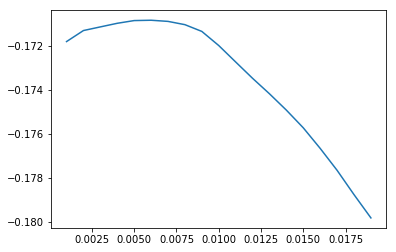

In [193]:
#Hyperparameters tuning
#Lasso
from operator import itemgetter
lr_las=Lasso()
alpha=[]
error=[]
for i in range(1,20):
    alpha.append(i/1000)
    lr_las=Lasso(i/1000)
    error.append(np.mean(cross_val_score(lr_las,X_train,y_train,cv=5,scoring='neg_mean_absolute_error')))
    
plt.plot(alpha,error)
err=tuple(zip(alpha,error))

best_alpha=max(err, key=itemgetter(1))[0]   
las=Lasso(alpha=best_alpha)
las.fit(X_train,y_train)

## Make predictions

In [194]:
preds_lr=lr.predict(X_test)
preds_lasso=las.predict(X_test)
preds_rf=gs_rf.best_estimator_.predict(X_test)

In [195]:
#Calculate the score of each model
scores_lr=mean_absolute_error(preds_lr,y_test)
scores_las=mean_absolute_error(preds_lasso,y_test)
scores_rf=mean_absolute_error(preds_rf,y_test)
scores=pd.DataFrame(index=['Linear_Reg','Lasso','Random_Forest'],data=[scores_lr,scores_las,scores_rf],columns=['scores_tuned']).sort_values('scores_tuned')

In [197]:
#Calculate the score of each model in percentage of average price of the apartments
scores_lr_pr=(mean_absolute_error(np.exp(preds_lr),np.exp(y_test)))/(np.mean(np.exp(y_test)))
scores_las_pr=(mean_absolute_error(np.exp(preds_lasso),np.exp(y_test)))/(np.mean(np.exp(y_test)))
scores_rf_pr=(mean_absolute_error(np.exp(preds_rf),np.exp(y_test)))/(np.mean(np.exp(y_test)))


In [198]:
#put the scores in a DataFrame
scores=pd.DataFrame({'scores':[scores_lr,scores_las,scores_rf],'scores in percentage':[scores_lr_pr,scores_las_pr,scores_rf_pr]}).sort_values('scores',ascending=True)
scores.rename(index={0:'Linear_Reg',1:'Lasso',2:'Random_Forest'})



,scores,scores in percentage
Random_Forest,0.128305,0.128976
Lasso,0.163880,0.165374
Linear_Reg,0.172618,0.171258
